# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Below, we created a plot with a clearly non-linear shape.

- plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree.
- print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

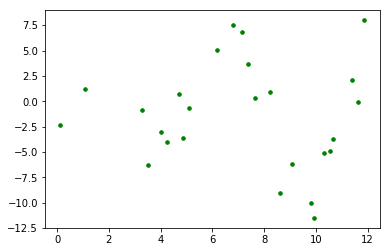

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

## Solution

Degree 2 0.029942542782105064
Degree 3 0.8607113826696453
Degree 4 0.9318946918521813


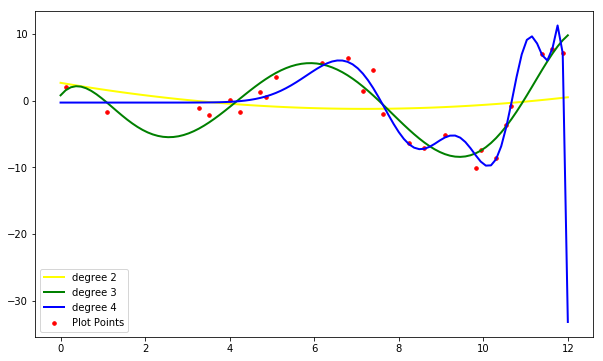

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

x_plot = np.linspace(0, 12, 100)

X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['yellow', 'green', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', s=50, marker='.', label="Plot Points")

for index, degree in enumerate([2, 3, 4]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(X)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[index], linewidth = 2, label="degree %d" % degree)
    print("Degree %d" % degree, r2_score(y, reg_poly.predict(X)))
    
plt.legend(loc='lower left')
plt.show();

## Summary

Degree 3 is the best fit. Degree 2 does not fit the data points well enough. Degree 4 overfits the points and therefore will not be useful testing against additional data points.

Great! You now know how to include polynomials in your linear model!